## Estimar el número $\pi$

# Calcular el número $\pi$ mediante el método de Monte Carlo

**1.-** Dibujamos un cuadrado de lado $l$ y dentro del cuadrado dibujamos un circulo con radio $r=l/2$.

**2.-** Dividimos el área del cuadrado entre el área del círculo. Primero tenemos que el área del cuadrado y del círculo están dados por:
$$A_{\square}=l^2$$
$$A_{\circ}=\pi r^2$$
Expresando el área del círculo en términos del lado del cuadrado se tiene lo siguiente:

$$A_{\circ}=\pi r^2=\pi(\dfrac{l}{2})^2$$
$$A_{\circ}=\pi\dfrac{l^2}{4}$$

Realizando la división se tiene que:
$$\dfrac{A_{\square}}{A_{\circ}}=\dfrac{l^2}{\dfrac{\pi l^2}{4}}$$

$$\dfrac{A_{\square}}{A_{\circ}}=\dfrac{4}{\pi}$$

$$\pi=\dfrac{4A_{\circ}}{A_{\square}}$$

**3.-** Para estimar las areas se van a utilizar números aleatorios, dibujaremos puntos de manera aleatoria en la figura del punto numero **1** se va a denotar $N_H$ al número de puntos que caen dentro del circulo y $N$ al número puntos que caen dentro del cuadrado o el número total de puntos que se generan.

Como los puntos van a estar tapando de a poco toda la superficie, la siguiente proporción $\dfrac{N_H}{N}=\dfrac{A_{\circ}}{A_{\square}}$ es una buena aproximación.

Con esto podemos aproximar pi como $\dfrac{4N_H}{N}=\pi$

Ahora se va a intentar estimar el número $\pi$

**Paso 1.** Sea

$N_H$ : el número de puntos que caen dentro del circulo

$N$: el número de puntos generados

$V$: punto aleatorio

**Paso 2.**  $V$ sigue una distribución uniforme con parametros $a=-1 , b=1$ o sea $V\sim U(-1,1)$ escribimos la función que regrese puntos aleatoerios.

In [ ]:
import numpy as np
import time

"""
  | Este es un generador de puntos personalizado que se basa en el método de generador
  v lineal congruencial
"""
class PuntoAleatorio:
  x = np.arange(2**(17)-1,2**(19)-1,3900)[int(time.time()%100)]    # semilla para x
  y = np.arange(2**(17)-1,2**(19)-1,3900)[100-int(time.time()%100)] # semilla para y
  n = 0
  def u(a,b):       # Generador lineal congruencial
    if PuntoAleatorio.n == 0:
      PuntoAleatorio.n+=1

      PuntoAleatorio.x*=(2**(19)-1)
      PuntoAleatorio.x%=(2**(32)+1)

      PuntoAleatorio.y*=274177
      PuntoAleatorio.y%=(2**(31)-1)

      return np.array([ a+(b-a)*( PuntoAleatorio.x/(2**(32)+1) ), a+(b-a)*( PuntoAleatorio.y/(2**(31)-1) )])
    else:
      PuntoAleatorio.n+=1

      PuntoAleatorio.x*=(2**(19)-1)
      PuntoAleatorio.x%=(2**(32)+1)

      PuntoAleatorio.y*=274177
      PuntoAleatorio.y%=(2**(31)-1)

      return np.array([ a+(b-a)*( PuntoAleatorio.x/(2**(32)+1) ), a+(b-a)*( PuntoAleatorio.y/(2**(31)-1) )]) # punto aleatorio

# Generar 50 puntos aleatorios
for i in range(50):
  print(PuntoAleatorio.u(-1,1))


[-0.4408275  -0.73452767]
[-0.12833255 -0.59392314]
[ 0.91045271 -0.06453556]
[ 0.52071056 -0.16537232]
[-0.22084737  0.71212557]
[0.59550812 0.45327591]
[-0.83593726 -0.16945834]
[0.96384692 0.42109656]
[0.40822781 0.99032997]
[ 0.53349482 -0.29913979]
[0.39820275 0.75007703]
[ 0.52643126 -0.12949651]
[-0.93604142 -0.96506037]
[-0.34594881  0.64216116]
[-0.46541032 -0.17923105]
[-0.5825065  0.969414 ]
[-0.58331595 -0.9771057 ]
[-0.97044585  0.09012602]
[-0.14357143  0.48062126]
[-0.63387687 -0.70495664]
[ 0.59989663 -0.89678179]
[ 0.002203   -0.94160895]
[-0.99768666  0.48278739]
[-0.14782143 -0.80177233]
[-0.854724    0.46817023]
[-0.68215897 -0.49109662]
[0.92137798 0.60119438]
[ 0.49757693 -0.3288218 ]
[-0.88472263  0.62652584]
[-0.57305511  0.97563931]
[ 0.65308112 -0.14174418]
[-0.05757979 -0.99511137]
[-0.33511338 -0.65021777]
[ 0.41291307 -0.75687878]
[ 0.95654336 -0.75201141]
[-0.75243649 -0.23359387]
[-0.67044529 -0.06536323]
[0.24926248 0.90448051]
[-0.919581   -0.24711464]


**Paso 3.** Realizar el dibujo del circulo.

No hace falta dibujar el cuadrado, ya que nuestra variable aleatoria no saldrá de la zona de interés.

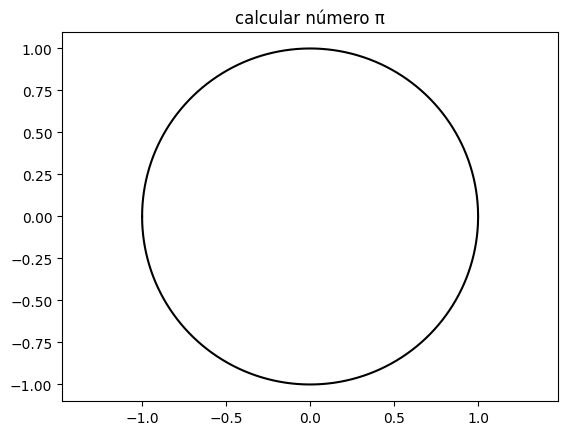

In [154]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

g1 = lambda x: np.sqrt(1-x**2)
g2 = lambda x: -np.sqrt(1-x**2)

x1 = np.arange(-1,1,0.00001)

plt.plot(x1,g1(x1),color = "black")
plt.plot(x1,g2(x1),c = 'black')
plt.title('calcular número π')
plt.axis('equal')
plt.show()

**Paso 4.** Generar los puntos y pintarlos en la gráfica en este caso se coma como ejemplo $N=5000$

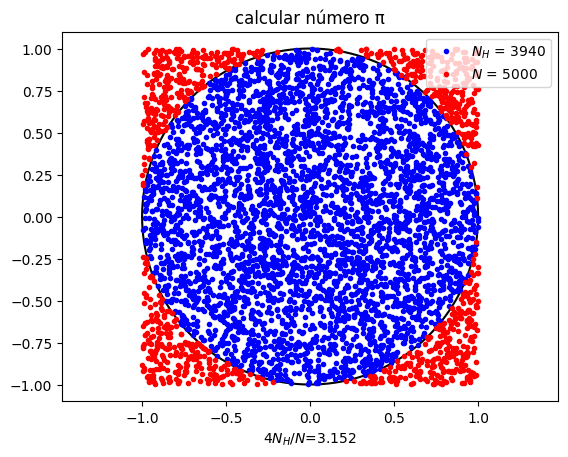

In [165]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

g1 = lambda x: np.sqrt(1-x**2)
g2 = lambda x: -np.sqrt(1-x**2)

x1 = np.arange(-1,1,0.00001)

x=[]
y=[]

N = 5000 # Numero de puntos a generar

# listas para guandar los numeros que cumplen la condicion
l1 = []
l2 = []
f1 = []
f2 = []

for i in range(N):
	v = PuntoAleatorio.u(-1,1)
	if np.linalg.norm(v)<=1:
		l1.append(v[0])
		l2.append(v[1])
	else:
		f1.append(v[0])
		f2.append(v[1])

plt.plot(x1,g1(x1),color = "black")
plt.plot(x1,g2(x1),c = 'black')
plt.plot(l1,l2,".",color='blue',label = "$N_H$ = {0}".format(len(l1)))
plt.plot(f1,f2,".",color='red',label = "$N$ = {0}".format(N))
plt.xlabel('$4N_H/N$={0}'.format(4*len(l1)/N))
plt.title('calcular número π')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

**Paso 5.** Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

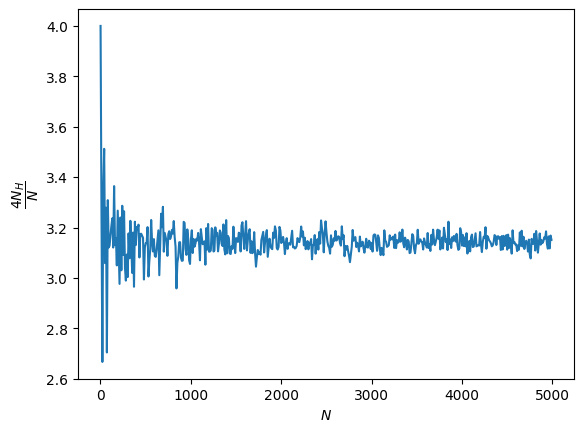

In [185]:
import matplotlib.pyplot as plt

def NH(n):
  s = 0
  for i in range(n):
    v = PuntoAleatorio.u(-1,1)
    if np.linalg.norm(v)<=1:
      s+=1
  return (4*s)/n

n = np.arange(1,5000,10)  # lista de n con saltos de diez en diez

lista = list( map(NH,n) )
plt.ylabel("$\dfrac{4N_H}{N}$")
plt.xlabel("$N$")
plt.plot(n,lista)
plt.show()

Por simple inspección parece no haber un estado estable o tal vez se necesita un $N$ muy grande para que sea segura la convergencia del valor de $\pi$.